In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read in files and rearrange dataframes
unbal = pd.read_csv('unbal_sink_df2018.csv')
cost = pd.read_csv('cost_df2018.csv')

fjc = pd.read_csv('./fjc_2018_no_match.csv', nrows=5000, usecols=['DISTRICT','SENTMON', 'SENTYR', 'PRISTOT', 'FINETOT', 'PROBTOT', 'DEFLGKY', 'FJDcode1', 'FJDcode2', 'FJDcode3', 'FJDcode4', 'FJDcode5', 'FJDcode6', 'FJDcode7', 'FJDcode8', 'FJDcode9', 'FJDcode10', 'DOCKET', 'matchFlag'])
ussc = pd.read_csv('./ussc_2018_no_match.csv', nrows=5000, usecols=['USSCIDN',	'SENTMON',	'SENTYR',	'DISTRICT',	'SENTTOT_new',	'FINE',	'PROBATN',	'floorSENTTOT',	'roundSENTTOT',	'USSCcode1',	'USSCcode2',	'USSCcode3',	'USSCcode4',	'USSCcode5',	'matchFlag'])
fjc = fjc[['DISTRICT','SENTMON', 'SENTYR', 'PRISTOT', 'FINETOT', 'PROBTOT', 'DEFLGKY', 'FJDcode1', 'FJDcode2', 'FJDcode3', 'FJDcode4', 'FJDcode5', 'FJDcode6', 'FJDcode7', 'FJDcode8', 'FJDcode9', 'FJDcode10', 'DOCKET', 'matchFlag']]
ussc = ussc[['DISTRICT', 'SENTMON', 'SENTYR','SENTTOT_new', 'FINE', 'PROBATN', 'USSCIDN','floorSENTTOT','roundSENTTOT' ,'USSCcode1', 'USSCcode2', 'USSCcode3', 'USSCcode4', 'USSCcode5', 'matchFlag']]
ussc = ussc.rename({'SENTTOT_new': 'PRISTOT', 'FINE': 'FINETOT', 'PROBATN': 'PROBTOT'}, axis=1)

In [3]:
# extract values only
cost_val = cost.iloc[:, 1:]
unbal_val = unbal.iloc[:, 1:]

(array([ 921.,    0.,    0., 3590.,    0.,    0.,  482.,    0.,    0.,
           7.]),
 array([1.08 , 1.382, 1.684, 1.986, 2.288, 2.59 , 2.892, 3.194, 3.496,
        3.798, 4.1  ]),
 <BarContainer object of 10 artists>)

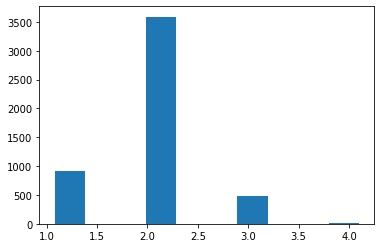

In [4]:
# plot cost
plt.hist(cost_val.min(), bins=10)

(array([4.399e+03, 2.500e+02, 1.190e+02, 6.500e+01, 5.600e+01, 2.300e+01,
        3.300e+01, 3.000e+00, 0.000e+00, 5.200e+01]),
 array([5.81118200e-10, 1.00000001e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

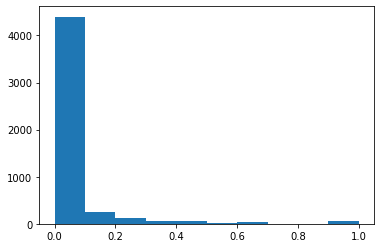

In [106]:
# plot solutions
plt.hist(unbal_val.max(), bins=10)

In [83]:
# extract maximum values to see what unmatched cases match best
unbal_max = pd.DataFrame(unbal_val.max(), columns=['max_val'])
unbal_max.reset_index(inplace=True)
unbal_max

,index,max_val
0,009010600167CR0010,8.748976e-07
1,009010700223CR0070,4.223434e-01
2,009011100368CR0010,7.033395e-06
3,009011200092CR0020,7.033394e-06
4,009011300050CR0010,2.935125e-06
...,...,...
4995,053931600153CR0050,2.249409e-01
4996,053931600165CR0010,4.574263e-01
4997,053931600175CR0010,4.418464e-05
4998,053931600175CR0030,2.400629e-05


In [103]:
# get usscidn index to get corresponding ussc id
unbal_max_id = pd.DataFrame(unbal.idxmax(), columns=['index'])

In [202]:
# get fjc ids greater than .9
unbal_max_9 = unbal_max[unbal_max.max_val > .9]
unbal_max_9 = unbal_max_9.rename({'index': 'DEFLGKY'}, axis=1)
unbal_max_9.head()

,DEFLGKY,max_val
11,009011600052CR0050,0.909164
29,009011700068CR0010,0.909147
84,010021700063CR0010,0.909196
154,010111710290CR0010,0.909147
197,010211700089CR0010,0.909196


In [113]:
# functions to get ussc id and cost
def get_ussc_id(fjc_id):
    index = unbal_max_id._get_value(fjc_id, 'index')
    ussc_id = unbal.USSCIDN.iloc[index]
    return ussc_id

def get_cost_val(fjc_id):
    index = unbal_max_id._get_value(fjc_id, 'index')
    cost_corr = cost.loc[index, fjc_id]
    return cost_corr

In [116]:
ussc_id = unbal_max_9.DEFLGKY.apply(get_ussc_id)
cost_corr = unbal_max_9.DEFLGKY.apply(get_cost_val)

In [118]:
# add columns to dataframe
unbal_max_9.insert(1, 'USSCIDN', ussc_id)
unbal_max_9.insert(3, 'cost', cost_corr)

In [119]:
unbal_max_9

,DEFLGKY,USSCIDN,max_val,cost
11,009011600052CR0050,2444414,0.909164,1.10
29,009011700068CR0010,2447064,0.909147,1.10
84,010021700063CR0010,2445255,0.909196,1.10
154,010111710290CR0010,2441955,0.909147,1.10
197,010211700089CR0010,2447687,0.909196,1.10
299,010431500462CR0670,2447333,0.908952,1.10
468,010431700525CR0010,2443464,0.909196,1.10
635,020651700239CR0010,2449378,0.909196,1.10
638,020651700319CR0010,2444497,0.909194,1.10
698,020681600234CR0010,2444059,0.909107,1.10


# Investigate what prominent variable(s) are making cases unmatch

In [172]:
fjc_1 = pd.merge(fjc, unbal_max_9, on='DEFLGKY')
ussc_1 = pd.merge(unbal_max_9, ussc, on='USSCIDN')
fjc_1.drop(['USSCIDN', 'max_val', 'cost'], axis=1)
ussc_1.drop(['DEFLGKY', 'max_val', 'cost'], axis=1)
fjc_1 = fjc_1[['DISTRICT','SENTMON', 'SENTYR', 'PRISTOT', 'FINETOT', 'PROBTOT', 'DEFLGKY', 'FJDcode1', 'FJDcode2', 'FJDcode3', 'FJDcode4', 'FJDcode5', 'FJDcode6', 'FJDcode7', 'FJDcode8', 'FJDcode9', 'FJDcode10', 'DOCKET', 'matchFlag']]
ussc_1 = ussc_1[['DISTRICT', 'SENTMON', 'SENTYR','PRISTOT', 'FINETOT', 'PROBTOT', 'USSCIDN','floorSENTTOT','roundSENTTOT' ,'USSCcode1', 'USSCcode2', 'USSCcode3', 'USSCcode4', 'USSCcode5', 'matchFlag']]

In [198]:
ussc_1.head()

,DISTRICT,SENTMON,SENTYR,PRISTOT,FINETOT,PROBTOT,USSCIDN,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,90,1,2018,102.0,0,0,2444414,102.0,102.0,181791.0,181791.0,NaN,NaN,NaN,0
1,90,2,2018,0.0,2000,60,2447064,NaN,NaN,18113.0,NaN,NaN,NaN,NaN,0
2,0,2,2018,0.0,5000,24,2445255,NaN,NaN,181349.0,181343.0,NaN,NaN,NaN,0
3,1,1,2018,0.0,7500,12,2441955,NaN,NaN,18922.0,NaN,NaN,NaN,NaN,0
4,2,2,2018,0.0,16500,60,2447687,NaN,NaN,18922.0,NaN,NaN,NaN,NaN,0


In [199]:
fjc_1.head()

,DISTRICT,SENTMON,SENTYR,PRISTOT,FINETOT,PROBTOT,DEFLGKY,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,DOCKET,matchFlag
0,90,1,2018,102.0,0,0,009011600052CR0050,21846,21846,21846,181951,181951,21846,21846,21846,181951,181951,1600052,0
1,90,2,2018,0.0,2000,60,009011700068CR0010,171201,-8,-8,-8,-8,171201,-8,-8,-8,-8,1700068,0
2,0,2,2018,0.0,5000,24,010021700063CR0010,163373,-8,-8,-8,-8,163373,-8,-8,-8,-8,1700063,0
3,1,1,2018,0.0,7500,12,010111710290CR0010,4946314,181001,181001,-8,-8,181001,4946314,181001,-8,-8,1710290,0
4,2,2,2018,0.0,16500,60,010211700089CR0010,18876,-8,-8,-8,-8,18876,-8,-8,-8,-8,1700089,0


In [200]:
var_diff = []
for i in range(52):
    for x in range(0,6):
        if ussc_1.iloc[i,x] != fjc_1.iloc[i,x]:
            var_diff.append(x)

    for k in range(9,14):
        if ussc_1.iloc[i,k] == fjc_1.iloc[i,7] or ussc_1.iloc[i,k] == fjc_1.iloc[i,8] or ussc_1.iloc[i,k]== fjc_1.iloc[i,9] or ussc_1.iloc[i,k]== fjc_1.iloc[i,10] or ussc_1.iloc[i,k]== fjc_1.iloc[i,11] or ussc_1.iloc[i,k]== fjc_1.iloc[i,12] or ussc_1.iloc[i,k]== fjc_1.iloc[i,13] or ussc_1.iloc[i,k]== fjc_1.iloc[i,14] or ussc_1.iloc[i,k]== fjc_1.iloc[i,15] or ussc_1.iloc[i,k]== fjc_1.iloc[i,16]:
            pass
        else:
            var_diff.append(k)
        break

(array([ 30.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

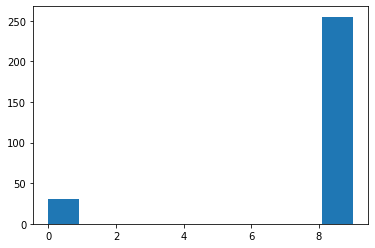

In [197]:
plt.hist(var_diff, bins=10)

# District and codes are making cases unmatch